# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

C:\Users\Aditya\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Function to prepare the data for LSTM
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

In [3]:
# Load historical stock data
data = pd.read_csv('AAPL.csv')

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [5]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
179,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
180,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
181,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700
182,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400
183,2018-03-29,167.804993,171.750000,166.899994,167.779999,167.779999,38398505


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,184.000000,184.000000,184.000000,184.000000,184.000000,1.840000e+02
mean,127.040245,129.918098,124.340381,127.352663,123.838032,1.910168e+08
std,24.314449,24.577906,24.176736,24.356534,25.655569,8.160281e+07
min,92.389999,93.769997,89.470001,90.519997,87.796822,3.839850e+07
25%,108.882499,112.362499,106.152502,109.204998,105.301765,1.273706e+08
50%,118.895000,120.865002,116.870003,119.190002,114.999730,1.744112e+08
75%,144.935005,147.695000,143.227493,144.704994,143.039467,2.207755e+08
max,180.289993,183.500000,177.619995,179.979996,179.979996,5.003630e+08


In [7]:
data.shape

(184, 7)

In [8]:
# Select the 'Close' price column for prediction
prices = data['Close'].values.reshape(-1, 1)

In [9]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

In [10]:
# Define the number of time steps for the LSTM
n_steps = 30

In [11]:
# Prepare the data
X, y = prepare_data(scaled_prices, n_steps)

In [12]:
# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [13]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [14]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
4/4 [==============================] - 3s 31ms/step - loss: 0.1164
Epoch 2/100
4/4 [==============================] - 0s 30ms/step - loss: 0.0891
Epoch 3/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0651
Epoch 4/100
4/4 [==============================] - 0s 26ms/step - loss: 0.0393
Epoch 5/100
4/4 [==============================] - 0s 27ms/step - loss: 0.0187
Epoch 6/100
4/4 [==============================] - 0s 27ms/step - loss: 0.0177
Epoch 7/100
4/4 [==============================] - 0s 26ms/step - loss: 0.0168
Epoch 8/100
4/4 [==============================] - 0s 26ms/step - loss: 0.0117
Epoch 9/100
4/4 [==============================] - 0s 26ms/step - loss: 0.0119
Epoch 10/100
4/4 [==============================] - 0s 27ms/step - loss: 0.0114
Epoch 11/100
4/4 [==============================] - 0s 26ms/step - loss: 0.0099
Epoch 12/100
4/4 [==============================] - 0s 27ms/step - loss: 0.0087
Epoch 13/100
4/4 [==============================]

In [15]:
print(X_train)

[[[0.10172151]
  [0.11412929]
  [0.079924  ]
  ...
  [0.40889785]
  [0.38262915]
  [0.44444447]]

 [[0.11412929]
  [0.079924  ]
  [0.1643193 ]
  ...
  [0.38262915]
  [0.44444447]
  [0.42957747]]

 [[0.079924  ]
  [0.1643193 ]
  [0.19539463]
  ...
  [0.44444447]
  [0.42957747]
  [0.41471056]]

 ...

 [[0.32953279]
  [0.35133021]
  [0.43103069]
  ...
  [0.65928911]
  [0.73630676]
  [0.74849094]]

 [[0.35133021]
  [0.43103069]
  [0.46501228]
  ...
  [0.73630676]
  [0.74849094]
  [0.74871455]]

 [[0.43103069]
  [0.46501228]
  [0.5052538 ]
  ...
  [0.74849094]
  [0.74871455]
  [0.77509507]]]


In [16]:
print(y_train)

[[0.42957747]
 [0.41471056]
 [0.42756548]
 [0.46970709]
 [0.44444447]
 [0.42622398]
 [0.40968032]
 [0.40330876]
 [0.40498551]
 [0.40152029]
 [0.36619721]
 [0.43706683]
 [0.3798346 ]
 [0.34406446]
 [0.27945451]
 [0.28437293]
 [0.17035552]
 [0.25452721]
 [0.20959088]
 [0.26481111]
 [0.25631567]
 [0.2704002 ]
 [0.22199866]
 [0.24144876]
 [0.2293763 ]
 [0.31924889]
 [0.3239437 ]
 [0.34138164]
 [0.24390788]
 [0.3217081 ]
 [0.30505255]
 [0.31868994]
 [0.2532976 ]
 [0.1733736 ]
 [0.19572996]
 [0.16476643]
 [0.0719875 ]
 [0.07388777]
 [0.12184218]
 [0.07623518]
 [0.03912363]
 [0.0387883 ]
 [0.0617036 ]
 [0.07142865]
 [0.13961553]
 [0.13123189]
 [0.17214399]
 [0.16934944]
 [0.21763918]
 [0.20277227]
 [0.21607424]
 [0.16946125]
 [0.03599375]
 [0.02459204]
 [0.        ]
 [0.05253749]
 [0.10988152]
 [0.08271855]
 [0.09289073]
 [0.0537671 ]
 [0.03219322]
 [0.06002685]
 [0.06885762]
 [0.09233179]
 [0.09099047]
 [0.15302931]
 [0.18958201]
 [0.1974067 ]
 [0.21059696]
 [0.18354578]
 [0.19237655]
 [0.14

In [17]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

1/1 [==============================] - 0s 63ms/step


In [18]:
# Inverse transform the predictions to get actual stock prices
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

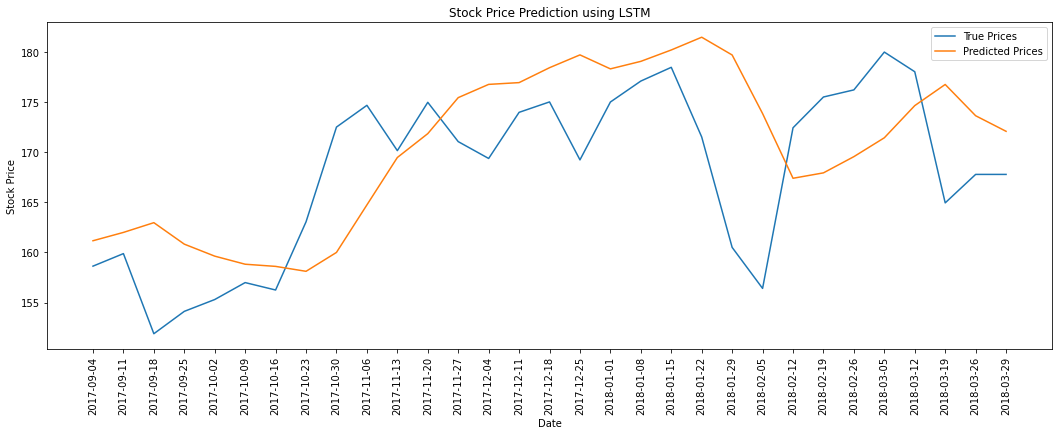

In [21]:
# Plot the results
plt.figure(figsize=(18, 6))
plt.plot(data['Date'][-len(y_test):], y_test, label='True Prices')
plt.plot(data['Date'][-len(y_test):], test_predictions, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using LSTM')
plt.xticks(rotation=90)
plt.legend()
plt.show()